In [1]:
import cv2
import os
from PIL import Image
import numpy as np
dim = (30, 30)
X_train =[]
Y_train=[]
n=0

#read train data
pathTrain='/kaggle/input/gtsrb-german-traffic-sign/train'
grup = os.listdir(pathTrain)
for i in grup:
    tem=os.path.join(pathTrain, i)
    img_nams=os.listdir(tem)
    n+=1
    for imasg in img_nams:
        img=np.array(Image.open(os.path.join(tem,imasg )).resize((30,30),Image.ANTIALIAS))
        X_train.append(img)
        s=int(i)
        Y_train.append(s)



X_t=np.array(X_train)
X_t = X_t.astype('float32')
X_train=X_t/255.0


Y_train=np.array(Y_train)
from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_train)
#shuffle
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train,Y_train, random_state=0)

print(n)



Using TensorFlow backend.


43


In [14]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5) ,activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2 , activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2, activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model = model.fit(X_train, Y_train, batch_size=128, epochs=100 , validation_split = 0.2)
history=trained_model.history

Train on 31367 samples, validate on 7842 samples
Epoch 1/100
31367/31367 [==============================] - 22s 712us/step - loss: 1.0152 - accuracy: 0.7405 - val_loss: 0.2585 - val_accuracy: 0.9297
Epoch 2/100
31367/31367 [==============================] - 23s 729us/step - loss: 0.1609 - accuracy: 0.9608 - val_loss: 0.1306 - val_accuracy: 0.9682
Epoch 3/100
31367/31367 [==============================] - 22s 714us/step - loss: 0.0774 - accuracy: 0.9802 - val_loss: 0.0976 - val_accuracy: 0.9765
Epoch 4/100
31367/31367 [==============================] - 22s 711us/step - loss: 0.0424 - accuracy: 0.9887 - val_loss: 0.1243 - val_accuracy: 0.9684
Epoch 5/100
31367/31367 [==============================] - 23s 736us/step - loss: 0.0346 - accuracy: 0.9908 - val_loss: 0.0780 - val_accuracy: 0.9809
Epoch 6/100
31367/31367 [==============================] - 22s 693us/step - loss: 0.0206 - accuracy: 0.9948 - val_loss: 0.0724 - val_accuracy: 0.9866
Epoch 7/100
31367/31367 [==========================

31367/31367 [==============================] - 22s 711us/step - loss: 2.2365e-07 - accuracy: 1.0000 - val_loss: 0.1075 - val_accuracy: 0.9912
Epoch 55/100
31367/31367 [==============================] - 21s 681us/step - loss: 2.0317e-07 - accuracy: 1.0000 - val_loss: 0.1085 - val_accuracy: 0.9912
Epoch 56/100
31367/31367 [==============================] - 21s 673us/step - loss: 1.7958e-07 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy: 0.9912
Epoch 57/100
31367/31367 [==============================] - 22s 689us/step - loss: 1.5660e-07 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 0.9912
Epoch 58/100
31367/31367 [==============================] - 21s 667us/step - loss: 1.3803e-07 - accuracy: 1.0000 - val_loss: 0.1121 - val_accuracy: 0.9912
Epoch 59/100
31367/31367 [==============================] - 21s 683us/step - loss: 1.2097e-07 - accuracy: 1.0000 - val_loss: 0.1131 - val_accuracy: 0.9912
Epoch 60/100
31367/31367 [==============================] - 21s 679us/step - loss: 

In [15]:
#read test data
import pandas as pd
data = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

X_test =[]
Y_test=[]
path='/kaggle/input/gtsrb-german-traffic-sign/test'

grup = os.listdir(path)
for imasg in grup:
    n+=1
    if(imasg!='GT-final_test.csv'):
        img=np.array(Image.open(os.path.join(path,imasg )).resize((30,30),Image.ANTIALIAS))
        X_test.append(img)
        p=(os.path.join('Test',imasg ))
        Y_test.append(data.loc[data['Path'] == p, 'ClassId'].iloc[0])

        
        
X_t=np.array(X_test)
X_t = X_t.astype('float32')
X_test=X_t/255.0
Y_test=np.array(Y_test)

from keras.utils import np_utils
Y_test=np_utils.to_categorical(Y_test)


In [16]:

test_loss,test_acc=model.evaluate(X_test,Y_test)
predicted_labels=model.predict(X_test)
print("without augmantation")
print("loss: ", test_loss,"  acc: ",test_acc)

12630/12630 [==============================] - 3s 262us/step
without augmantation
loss:  0.8349997653992141   acc:  0.9520981907844543


In [17]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model_gen = Sequential()
model_gen.add(Conv2D(filters=32, kernel_size=(5,5) ,activation='relu', input_shape=X_train.shape[1:]))
model_gen.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2 , activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model_gen.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2, activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model_gen.add(Flatten())
model_gen.add(Dense(256, activation='relu'))
# model.add(Dropout(rate=0.5))
model_gen.add(Dense(43, activation='softmax'))

model_gen.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


from sklearn.model_selection import train_test_split
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_train, Y_train, test_size=0.2)




from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (
    #rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False
    )



train_generator = train_datagen.flow(
        X_train_gen,
        y_train_gen,
        batch_size=128,)

# validation_generator = train_datagen.flow( X_test_gen,y_test_gen, )

test_datagen = ImageDataGenerator(rescale=1)
validation_generator = test_datagen.flow( X_test_gen,y_test_gen, )

train_generator_model=model_gen.fit_generator(
        train_generator,
        steps_per_epoch=len(X_train_gen)/128,
        epochs=100,
        validation_data=validation_generator,
        )





history_gen=train_generator_model.history

Epoch 1/100
246/245 [==============================] - 30s 124ms/step - loss: 2.9150 - accuracy: 0.1906 - val_loss: 4.3928 - val_accuracy: 0.3870
Epoch 2/100
246/245 [==============================] - 31s 126ms/step - loss: 2.1168 - accuracy: 0.3686 - val_loss: 1.5448 - val_accuracy: 0.5601
Epoch 3/100
246/245 [==============================] - 30s 123ms/step - loss: 1.6262 - accuracy: 0.4916 - val_loss: 3.0625 - val_accuracy: 0.6668
Epoch 4/100
246/245 [==============================] - 30s 123ms/step - loss: 1.2851 - accuracy: 0.5886 - val_loss: 0.6515 - val_accuracy: 0.7279
Epoch 5/100
246/245 [==============================] - 30s 120ms/step - loss: 1.0423 - accuracy: 0.6625 - val_loss: 0.1405 - val_accuracy: 0.7752
Epoch 6/100
246/245 [==============================] - 30s 122ms/step - loss: 0.8843 - accuracy: 0.7118 - val_loss: 0.0788 - val_accuracy: 0.8201
Epoch 7/100
246/245 [==============================] - 32s 128ms/step - loss: 0.7605 - accuracy: 0.7546 - val_loss: 0.5052 -

246/245 [==============================] - 30s 123ms/step - loss: 0.0830 - accuracy: 0.9738 - val_loss: 0.0000e+00 - val_accuracy: 0.9953
Epoch 57/100
246/245 [==============================] - 30s 120ms/step - loss: 0.0896 - accuracy: 0.9713 - val_loss: 3.4493e-04 - val_accuracy: 0.9893
Epoch 58/100
246/245 [==============================] - 30s 120ms/step - loss: 0.0861 - accuracy: 0.9723 - val_loss: 4.9936e-04 - val_accuracy: 0.9921
Epoch 59/100
246/245 [==============================] - 30s 122ms/step - loss: 0.0793 - accuracy: 0.9752 - val_loss: 0.0022 - val_accuracy: 0.9903
Epoch 60/100
246/245 [==============================] - 30s 121ms/step - loss: 0.0789 - accuracy: 0.9743 - val_loss: 0.0000e+00 - val_accuracy: 0.9899
Epoch 61/100
246/245 [==============================] - 30s 123ms/step - loss: 0.0804 - accuracy: 0.9745 - val_loss: 0.0014 - val_accuracy: 0.9887
Epoch 62/100
246/245 [==============================] - 30s 121ms/step - loss: 0.0799 - accuracy: 0.9746 - val_loss

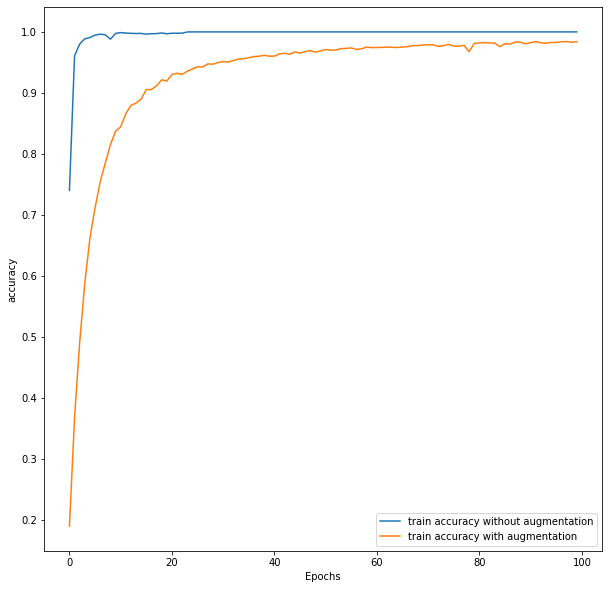

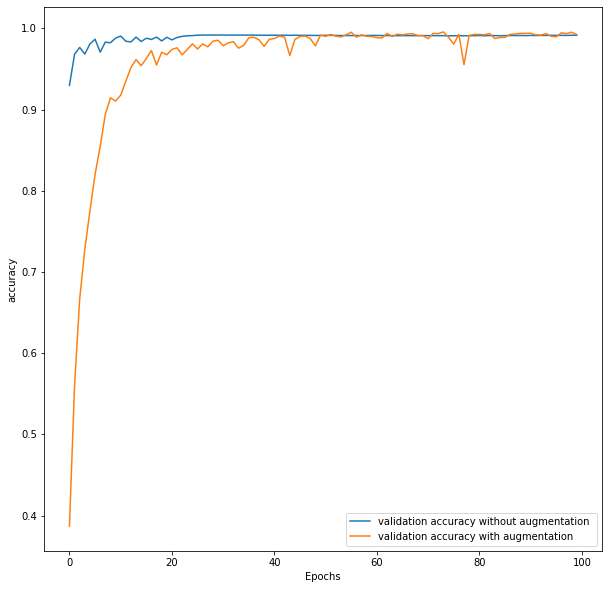

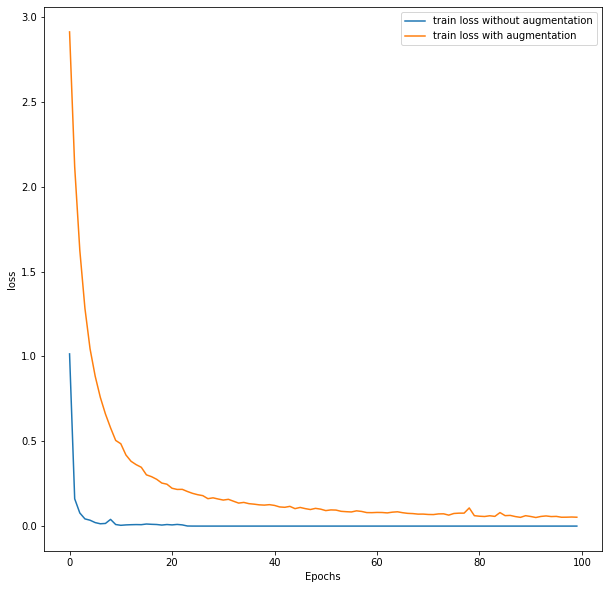

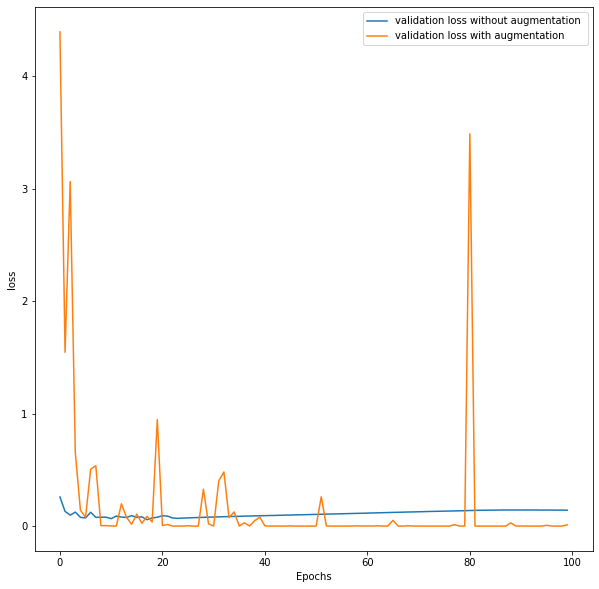

In [18]:
import matplotlib.pyplot as plt


losses=history['loss']
val_losses=history['val_loss']

acc=history['accuracy']
val_acc = history['val_accuracy']

losses_gen=history_gen['loss']
val_losses_gen=history_gen['val_loss']

acc_gen=history_gen['accuracy']
val_acc_gen = history_gen['val_accuracy']



plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(acc_gen)
plt.legend(['train accuracy without augmentation','train accuracy with augmentation'])

plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(val_acc)
plt.plot(val_acc_gen)
plt.legend(['validation accuracy without augmentation ','validation accuracy with augmentation'])

# plt.figure(figsize=(10,10))
# plt.xlabel('Epochs')
# plt.ylabel('loss')
# plt.plot(losses)
# plt.plot(losses_gen)
# plt.legend(['train loss without augmentation','train loss with augmentation'])

# plt.figure(figsize=(10,10))
# plt.xlabel('Epochs')
# plt.ylabel('loss')
# plt.plot(val_losses)
# plt.plot(val_losses_gen)
# plt.legend(['validation loss without augmentation ','validation loss with augmentation'])

In [20]:
test_loss,test_acc=model_gen.evaluate(X_test,Y_test)
predicted_labels=model_gen.predict(X_test)
print("with augmantation\n")
print("loss: ", test_loss,"  acc: ",test_acc)

12630/12630 [==============================] - 4s 328us/step
with augmantation

loss:  0.4657676064852487   acc:  0.9216943979263306


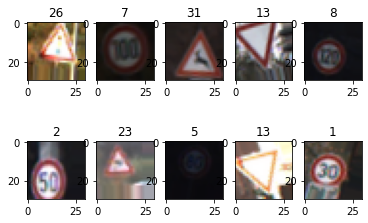

In [19]:

import matplotlib.pyplot as plt
from numpy import expand_dims
batch = train_generator[0][0]
batch=batch*255
fig = plt.figure()
for i in range (10):
    a = fig.add_subplot(2, 5,i+ 1)
    image = batch[i].astype('uint8')
    imgplot = plt.imshow(image,cmap='binary')
    a.set_title(train_generator[0][1][i].argmax(0))



